Задание базового уровня


#Шаг 1: Создание датафрейма на основе ранее подотовленных данных.

In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/ML/TUSUR_ML/#3_regression&clustering/regression/data/'

df = pd.read_csv(data_path + 'prepared_ds.csv', index_col = 0)
df = df[['store_id', 'order_price', 'profit', 'delivery_distance', 'planned_prep_time', 'region_id', 'items_count', 'prepared_on_time']]
df.head(5)

,store_id,order_price,profit,delivery_distance,planned_prep_time,region_id,items_count,prepared_on_time
0,5014,30.49,45.504,2205,15.0,683,2,True
1,3856,60.21,30.336,1368,10.0,683,2,True
2,10825,8.27,43.608,459,20.0,683,1,True
3,5640,24.68,32.864,2611,20.0,709,2,True
4,7283,14.02,11.060,1041,15.0,707,1,True


#Шаг 2: Разделение данных на признаки и целевую переменную.
В качестве целевой переменной выступает *prepared_on_time*

In [3]:
X = df.drop('prepared_on_time', axis = 1)
y = df['prepared_on_time']

#Шаг 3: Нормализация данных.
Используем z-нормализацию.  

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_X = X.copy()
std_X[std_X.columns] = scaler.fit_transform(std_X[std_X.columns])

std_X.head(5)

,store_id,order_price,profit,delivery_distance,planned_prep_time,region_id,items_count
0,-0.649128,-0.484677,0.232698,-0.738129,-1.030619,-0.809636,-0.438332
1,-1.054412,0.314862,-0.331389,-1.071708,-1.704810,-0.809636,-0.438332
2,1.384641,-1.082449,0.162187,-1.433982,-0.356428,-0.809636,-1.000931
3,-0.430037,-0.640980,-0.237374,-0.576322,-0.356428,1.778393,-0.438332
4,0.144990,-0.927760,-1.048249,-1.202031,-1.030619,1.579313,-1.000931


#Шаг 4: разделение данных на обучающую и тестовую выборки
# в отношении 80 / 20.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size = 0.2, random_state = 0, stratify = y) # stratify = y для одинакового соотношения представителей классов в тестовой и обучающей выборках

#Шаг 5: Подбор гиперпараметров.


In [37]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'fit_intercept': [True, False],
    'C': [0.001, 0.1, 1],          # Коэффициент регуляризации
    'penalty': ['l1', 'l2', 'elasticnet', None], # Тип регуляризации
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.5, 0.7],       # Для elasticnet
    'class_weight' : ['balanced']
}

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

ValueError: Invalid parameter 'threshold' for estimator LogisticRegression(C=0.001, class_weight='balanced', l1_ratio=0.1, penalty='l1',
                   solver='saga'). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

Best params: {'C': 0.001, 'fit_intercept': True, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}

Best accuracy: 0.8354470852914064

В дальнейшкм будет использованна модель с данными гиперпараметрами.

#Шаг 6: Обучение модели с полученными гиперпараметрами.

In [29]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', l1_ratio=0.5,
                   penalty='elasticnet', solver='saga')

Для устранения Warning`a при обучении модели, вручную подстваим нужные значения гперпараметров, удалив гиперпараметр 'l1_ratio' ввиду использования l1-регуляризации.

In [75]:
final_model = LogisticRegression(C=0.001, l1_ratio=0.5,
                   penalty='elasticnet', solver='saga')
final_model.fit(X_train, y_train)

LogisticRegression(C=0.001, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [76]:
y_pred = final_model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1025
        True       0.84      1.00      0.91      5204

    accuracy                           0.84      6229
   macro avg       0.42      0.50      0.46      6229
weighted avg       0.70      0.84      0.76      6229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
y_proba = final_model.predict_proba(X_train)[:, 1]  # Вероятности для класса 1

# Устанавливаем кастомный порог (например, 0.3)
threshold = 0.834
y_pred_custom = (y_proba >= threshold).astype(int)

In [104]:
print(classification_report(y_train, y_pred_custom))

              precision    recall  f1-score   support

       False       0.16      1.00      0.28      1025
        True       0.00      0.00      0.00      5204

    accuracy                           0.16      6229
   macro avg       0.08      0.50      0.14      6229
weighted avg       0.03      0.16      0.05      6229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Предварительно оценим модель на обучающей выборке.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = final_model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.16455289773639428
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Значение recall = 1 подозрительно, оно говорит о возможном дизбалансе классов (скорее всего - перевес класса True). Чтобы проверить это, выведем гистограмму.

<ipython-input-32-73bc0b1fff85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'prepared_on_time', data = df, palette = 'hls')


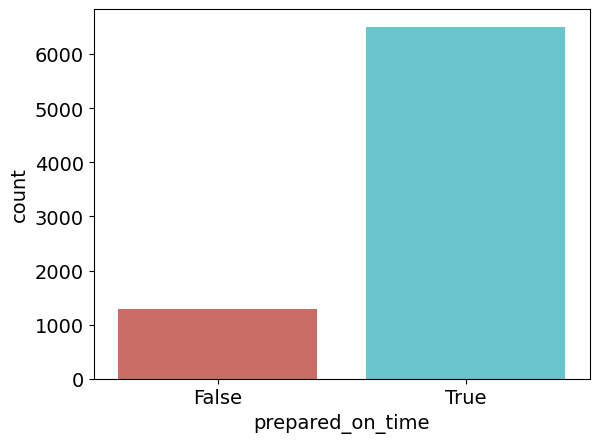

In [32]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns

sns.countplot(x = 'prepared_on_time', data = df, palette = 'hls')
plt.show()

Наблюдается значительный перевес клсса True, значит стоит это учитывать при оценке модели: добавить агрумент average='weighted' при расчете точности, полноты и f1-score. Это позволит взвешать метрики для каждого класса пропорционально количеству представителей этого класса.

In [33]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.16455289773639428
Precision: 0.027077656153444235
Recall: 0.16455289773639428
F1-score: 0.0465030935152479


#Шаг 7: Тестирование модели на тестовой выборке.

In [34]:
y_test_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.1643132220795892
Precision: 0.026998834950176402
Recall: 0.1643132220795892
F1-score: 0.046377271061052744


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.16      1.00      0.28       256
        True       0.00      0.00      0.00      1302

    accuracy                           0.16      1558
   macro avg       0.08      0.50      0.14      1558
weighted avg       0.03      0.16      0.05      1558



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Значения метрик модели на обучающей и тестовой выборках практически совпадают, из чего можем сделать вывод о хорошем качестве модели: она не переобучена и значения метрик достаточно высокие.